In [167]:
from pinn_magnetic_experimental import MultiPoleModel
import smtf_utility as util

In [168]:
sim = util.bf_simulator([1, 1.33, 1.66, 1.99], 30)
sim.add_dipole(0,0.1,0,1,0,0)
sim.add_dipole(0.1,0,0,0,2,0)

In [169]:
positions, values = sim.get_data()

positions, values = util.shuffle_data(positions, values)

In [170]:
models = []
moments = [1, 2, 3, 4, 8]
maxmodels = len(moments)

for i in range(maxmodels):
    models.append(MultiPoleModel(moments=moments[i], lrate=1000, krate=1000))

In [171]:
test_epochs = 20

In [172]:
# train the models on a smaller number of epochs
for i in range(maxmodels):
    print("----- Model ", i, " -----")
    models[i].fit(positions, values, epochs=test_epochs)

----- Model  0  -----
epoch  0 --- Loss --- 1.0856773e-05
epoch  1 --- Loss --- 7.1036607e-06
epoch  2 --- Loss --- 4.8490256e-06
epoch  3 --- Loss --- 3.4934435e-06
epoch  4 --- Loss --- 2.67753e-06
epoch  5 --- Loss --- 2.1857627e-06
epoch  6 --- Loss --- 1.8888435e-06
epoch  7 --- Loss --- 1.7091685e-06
epoch  8 --- Loss --- 1.6001335e-06
epoch  9 --- Loss --- 1.5337301e-06
epoch  10 --- Loss --- 1.493109e-06
epoch  11 --- Loss --- 1.4681223e-06
epoch  12 --- Loss --- 1.4526481e-06
epoch  13 --- Loss --- 1.4429864e-06
epoch  14 --- Loss --- 1.436895e-06
epoch  15 --- Loss --- 1.4330105e-06
epoch  16 --- Loss --- 1.430501e-06
epoch  17 --- Loss --- 1.4288563e-06
epoch  18 --- Loss --- 1.4277614e-06
epoch  19 --- Loss --- 1.4270206e-06
----- Model  1  -----
epoch  0 --- Loss --- 1.0820527e-05
epoch  1 --- Loss --- 5.1509483e-06
epoch  2 --- Loss --- 3.046401e-06
epoch  3 --- Loss --- 2.2511647e-06
epoch  4 --- Loss --- 1.941191e-06
epoch  5 --- Loss --- 1.8136776e-06
epoch  6 --- Loss

In [173]:
# find the model with the smallest fit error
for i in range(maxmodels):
    print("moments: ", moments[i], "Loss: ", models[i].loss_history[-1])

moments:  1 Loss:  1.4270206e-06
moments:  2 Loss:  1.6145115e-06
moments:  3 Loss:  1.6521753e-06
moments:  4 Loss:  2.4677624e-07
moments:  8 Loss:  4.642509e-07


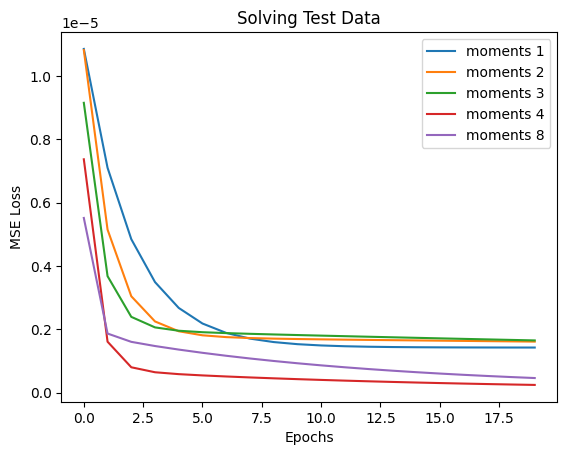

In [174]:
import matplotlib.pyplot as plt

x = range(test_epochs)

# plot lines 
for i in range(maxmodels):
    plt.plot(x, models[i].loss_history, label = "moments " + str(moments[i]))
 
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title('Solving Test Data')
plt.legend() 
plt.show()

In [175]:
print("[Position, Value]")
for i in range(maxmodels):
    print(models[i].moment())

[Position, Value]
[[array([[-0.01754597,  0.05639514, -0.05395031]], dtype=float32), array([[1.0552974 , 1.916403  , 0.01608877]], dtype=float32)]]
[[array([[-0.01230144,  0.01842244, -0.04983978]], dtype=float32), array([[0.7418587 , 1.0428166 , 0.01972779]], dtype=float32)], [array([[-0.02416464, -0.04194036,  0.02218565]], dtype=float32), array([[ 0.22023636,  0.89593756, -0.01972484]], dtype=float32)]]
[[array([[ 0.00231184, -0.02657497,  0.02205961]], dtype=float32), array([[0.04583322, 0.9718722 , 0.10815683]], dtype=float32)], [array([[-0.05231303,  0.00146394,  0.08942528]], dtype=float32), array([[0.32326284, 0.41621792, 0.00338261]], dtype=float32)], [array([[-0.04594776,  0.03655383,  0.05930585]], dtype=float32), array([[ 0.58979315,  0.5115402 , -0.08980861]], dtype=float32)]]
[[array([[ 0.1532828 , -0.0427458 ,  0.01175446]], dtype=float32), array([[-0.05626235,  0.8555505 ,  0.0089836 ]], dtype=float32)], [array([[-0.01249568, -0.0590634 ,  0.08752205]], dtype=float32), 